In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import pylab as plt

In [35]:
data1 = pd.read_csv('data1.csv')
data1['I'] = data1['I'].str.replace(',', '').astype(float)
data2 = pd.read_csv('data2.csv')
data2['I'] = data2['I'].str.replace(',', '').astype(float)
data3 = pd.read_csv('data3.csv')
data3['I'] = data3['I'].str.replace(',', '').astype(float)

In [36]:
data1

,Unnamed: 0,r,I,error
0,0,0.0498,2851.7503,21.4431
1,1,0.0695,2380.3585,13.4725
2,2,0.0970,2052.6371,25.9921
3,3,0.1353,1505.7303,42.5917
4,4,0.1889,1318.8918,53.6306
5,5,0.2636,916.9997,80.7550
6,6,0.3679,1065.1732,31.3478
7,7,0.5134,480.5023,28.1698
8,8,0.7165,328.1725,10.5424
9,9,1.0000,211.4380,18.0805


In [37]:
data2

,Unnamed: 0,r,I,error
0,0,0.0498,2775.6950,49.5298
1,1,0.0695,2449.7728,46.1750
2,2,0.0970,1854.5801,6.6762
3,3,0.1353,1526.0567,7.2893
4,4,0.1889,1364.9964,14.0266
5,5,0.2636,872.7204,33.6829
6,6,0.3679,822.0273,10.2018
7,7,0.5134,560.5012,11.8198
8,8,0.7165,572.1500,22.5322
9,9,1.0000,328.2900,25.5976


In [38]:
data3

,Unnamed: 0,r,I,error
0,0,0.0498,2945.6142,12.1356
1,1,0.0695,2377.2111,48.7825
2,2,0.0970,1884.9580,32.0584
3,3,0.1353,1502.2740,3.4252
4,4,0.1889,1131.2861,60.8621
5,5,0.2636,973.9710,1.8319
6,6,0.3679,652.7160,40.8658
7,7,0.5134,268.6288,1.7304
8,8,0.7165,376.3815,3.9352
9,9,1.0000,255.0997,60.4152


## $I(r)=244\ e^{\frac{\ln(r)}{R}}$

## $\ln(I(r))=\ln(244)+\frac{\ln(r)}{R}$

### $x=\ln(r)$

### $y=\ln(I(r))$

### $a=\frac{1}{R}$

### $b=\ln{244}$

## $y=ax+b$

In [39]:
r = data1['r'].values
I = data1['I'].values
x = np.log(r)
y = np.log(I)

In [42]:
x

array([-2.99974029, -2.66642853, -2.3330443 , -2.00026074, -1.6665375 ,
       -1.33332248, -0.99994412, -0.66670001, -0.33337703,  0.        ])

# (الف

In [43]:
a = np.sum(y*(x-x.mean()))/np.sum((x-x.mean())**2)
R = 1/a
print('a is {:2.4f}'.format(a))
print('R is {:2.4f}'.format(R))

a is -0.8355
R is -1.1969


In [8]:
# np.polyfit(x,y,1)

# (ب

## linear plot

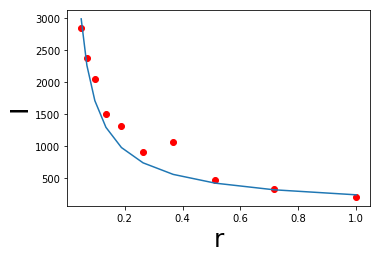

In [9]:
plt.plot(r,I,'ro')
plt.plot(r,244*np.exp(np.log(r)/R))
# plt.plot(r,I_0*np.exp(np.log(r)/R))
plt.xlabel('r',fontsize=25)
plt.ylabel('I',fontsize=25)
plt.subplots_adjust(left=0.2,bottom=0.2)
plt.savefig('linear.jpg')

## log plot

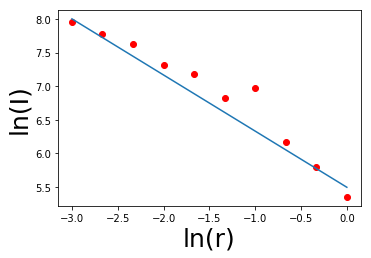

In [10]:
# plt.plot(r,I,'ro')
# plt.plot(r,244*np.exp(np.log(r)/R))
# # plt.plot(r,I_0*np.exp(np.log(r)/R))
# plt.xscale('log')
# plt.yscale('log')

plt.plot(x,y,'ro')
plt.plot(x,a*x+np.log(244))
# plt.plot(r,I_0*np.exp(np.log(r)/R))
plt.xlabel('ln(r)',fontsize=25)
plt.ylabel('ln(I)',fontsize=25)
plt.subplots_adjust(left=0.2,bottom=0.2)
plt.savefig('log.jpg')

# (ج

### $b=\ln(I_0)$

In [44]:
b = y.mean()-a*x.mean()
I_0 = np.exp(b)
print('b is {:2.4f}'.format(b))
print('R is {:2.4f}'.format(R))
print('I_0 is {:2.4f}'.format(I_0))

b is 5.6441
R is -1.1969
I_0 is 282.6332


# (د

In [1]:
# np.sum((a*x+np.log(244)-y)**2)/9,np.sum((a*x+b-y)**2)/8

In [2]:
# 1/0.8576

In [3]:
# print(np.sum((248*np.exp(np.log(r)/(-1.166))-I)**2))

In [47]:
print(np.sum((244*np.exp(np.log(r)/R)-I)**2)/9)
print(np.sum((I_0*np.exp(np.log(r)/R)-I)**2)/8)

65708.32640732556
81687.43307378508


the first model is better.

# (ه

## $\chi^2=\Sigma{\frac{(y_{model}(x_i)-y_{obs}(x_i))^2}{\sigma_i^2}}$

# (و

# (ز

In [56]:
R1 = R
R2 = 1/(-0.6851)
R3 = 1/(-0.8602)

In [57]:
I_01 = I_0
I_02 = np.exp(5.9486)
I_03 = np.exp(5.5174)
# I_02 = 5.9486
# I_03 = 5.5174

In [58]:
print('The best R is {:2.4f}, error {:2.4f}'.format(np.mean([R1,R2,R3]),np.std([R1,R2,R3])))
print('The best I0 is {:2.4f}, error {:2.4f}'.format(np.mean([I_01,I_02,I_03]),np.std([I_01,I_02,I_03])))

The best R is -1.2730, error 0.1327
The best I0 is 304.9455, error 57.0250


In [55]:
np.exp(5.94)

379.93492953814206